<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Import Required Libraries</h1>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

from imblearn.over_sampling import SMOTE
from collections import Counter

from warnings import filterwarnings
filterwarnings("ignore")

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Load Dataset</h1>
</div>

In [2]:
train = pd.read_csv('train.csv')

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Dataset View</h1>
</div>

In [3]:
print("Train shape:", train.shape)

Train shape: (593994, 13)


In [4]:
train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [5]:
train.tail()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


`check Missing Values`

In [6]:
print("="*30)
print("| 'Missing values in dataset':|")
print("="*30)
print(train.isnull().sum())

| 'Missing values in dataset':|
id                      0
annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64


`Check Duplicate`

In [7]:
train.duplicated().sum().sum()

np.int64(0)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Statistical Analysis</h1>
</div>

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [9]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,593994.0,296996.500000,171471.442236,0.000,148498.250,296996.500,445494.750,593993.000
annual_income,593994.0,48212.202976,26711.942078,6002.430,27934.400,46557.680,60981.320,393381.740
debt_to_income_ratio,593994.0,0.120696,0.068573,0.011,0.072,0.096,0.156,0.627
credit_score,593994.0,680.916009,55.424956,395.000,646.000,682.000,719.000,849.000
loan_amount,593994.0,15020.297629,6926.530568,500.090,10279.620,15000.220,18858.580,48959.950
interest_rate,593994.0,12.356345,2.008959,3.200,10.990,12.370,13.680,20.990
loan_paid_back,593994.0,0.798820,0.400883,0.000,1.000,1.000,1.000,1.000


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Visualization</h1>
</div>

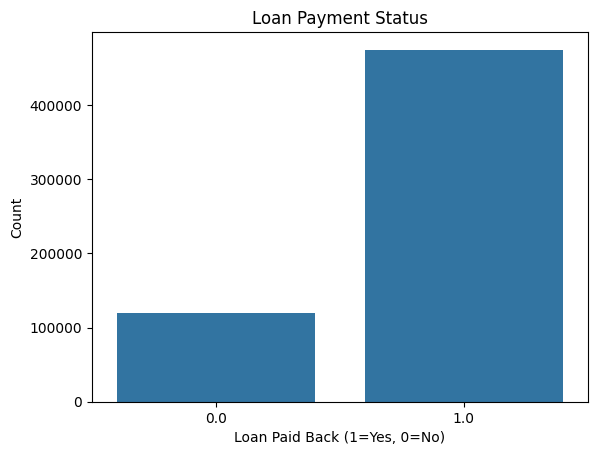

In [10]:
sns.countplot(x="loan_paid_back", data=train)
plt.title("Loan Payment Status")
plt.xlabel("Loan Paid Back (1=Yes, 0=No)")
plt.ylabel("Count")
plt.show()

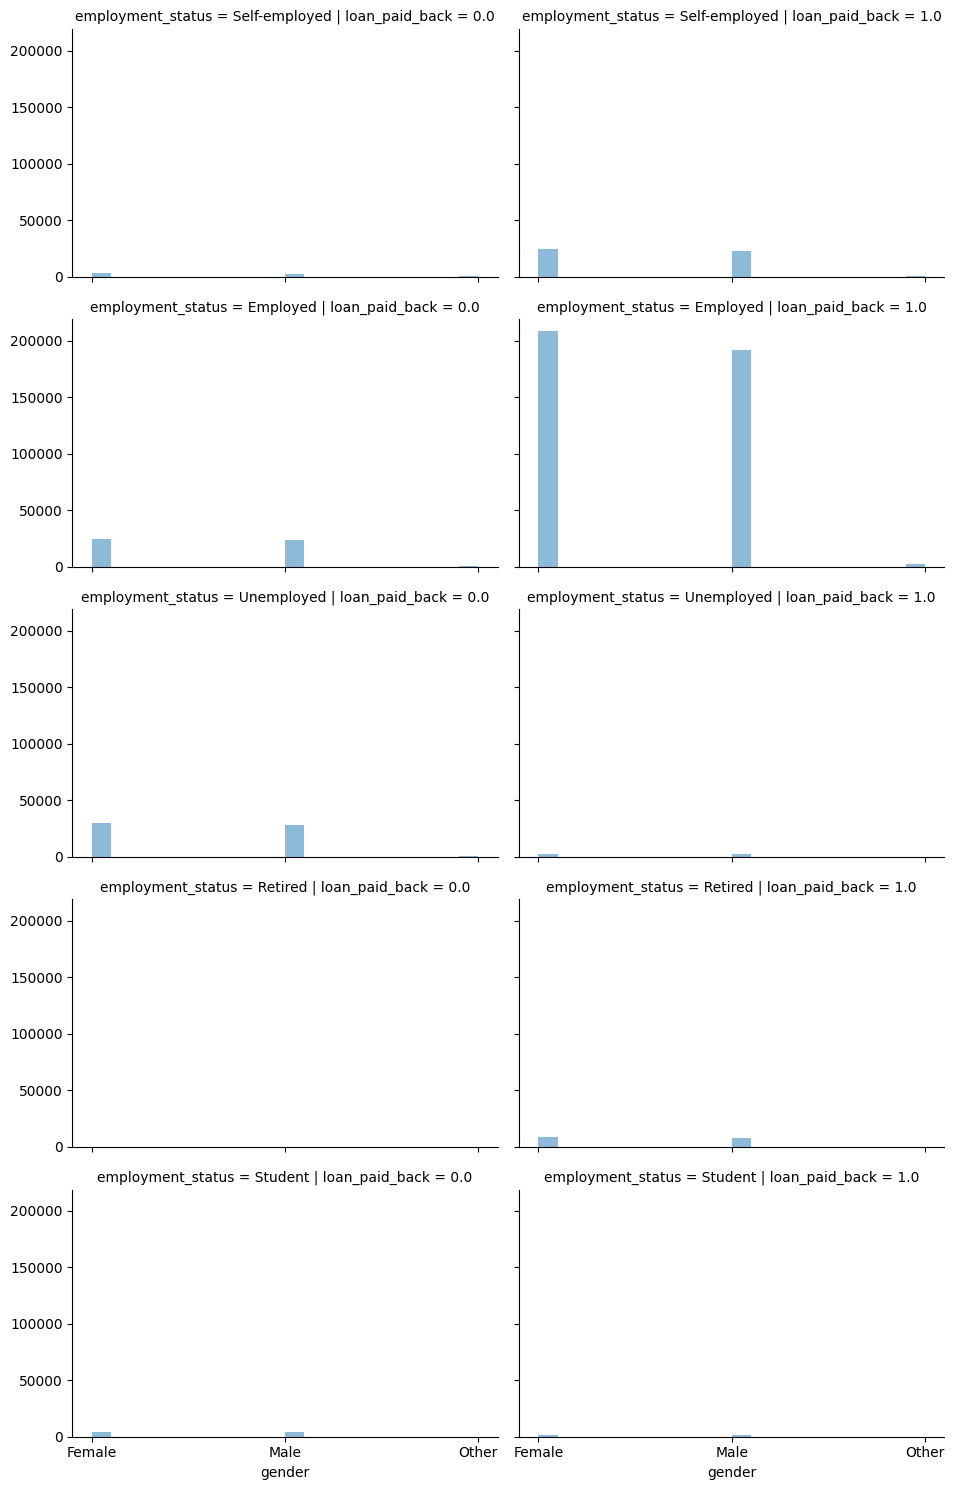

In [11]:
grid = sns.FacetGrid(train, col='loan_paid_back', row='employment_status', aspect=1.6)
grid.map(plt.hist, 'gender', alpha=.5, bins=20)
grid.add_legend()

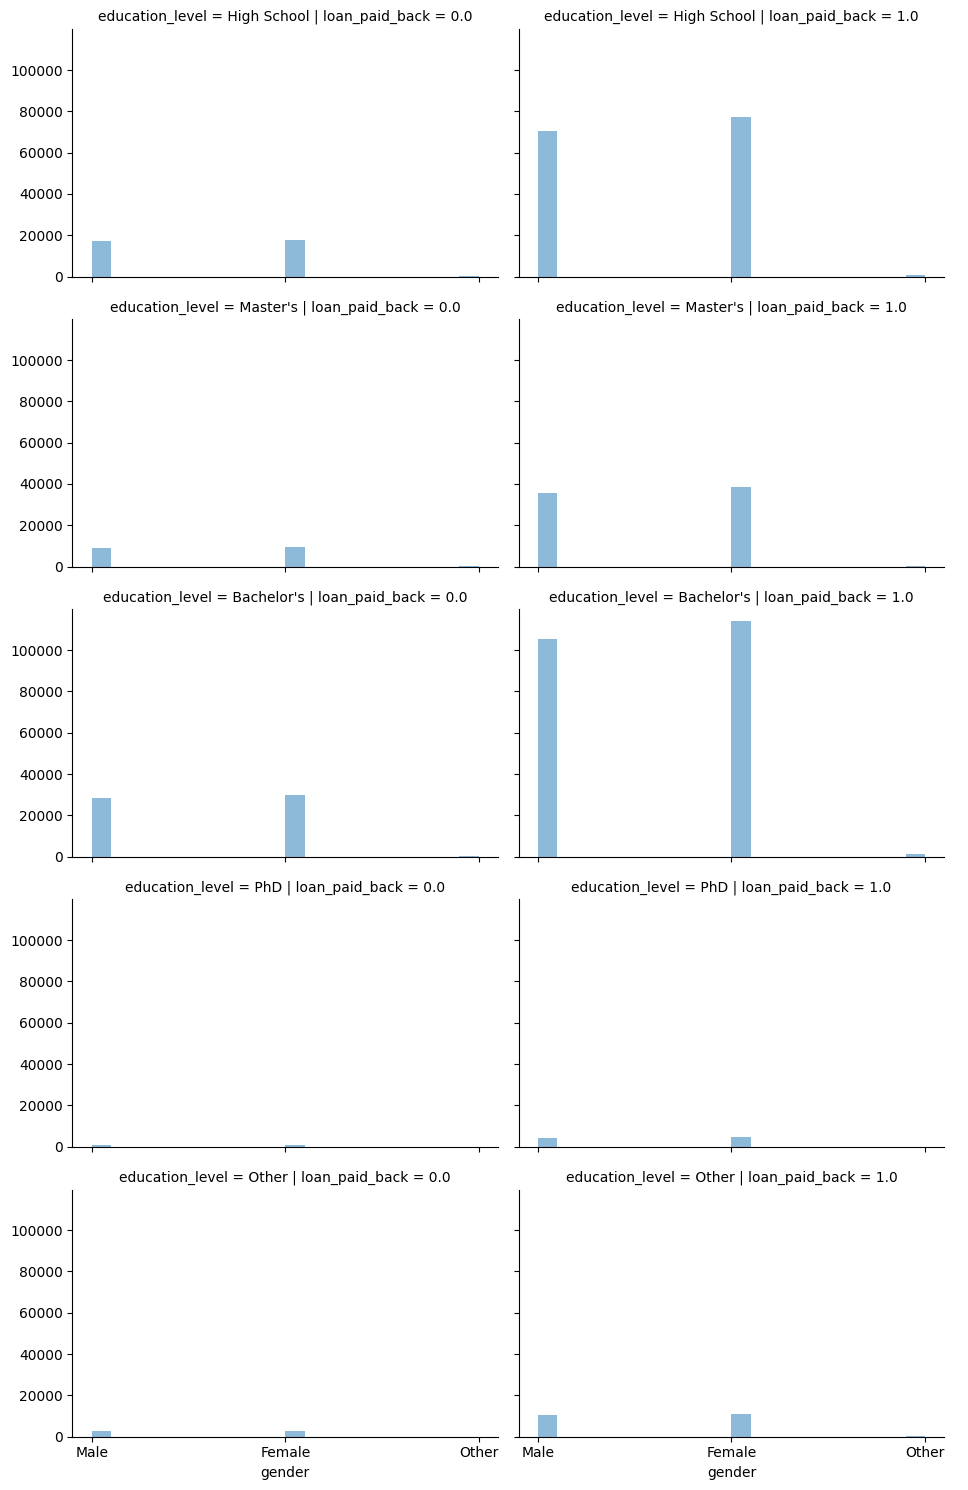

In [12]:
grid = sns.FacetGrid(train, col='loan_paid_back', row='education_level', aspect=1.6)
grid.map(plt.hist, 'gender', alpha=.5, bins=20)
grid.add_legend()

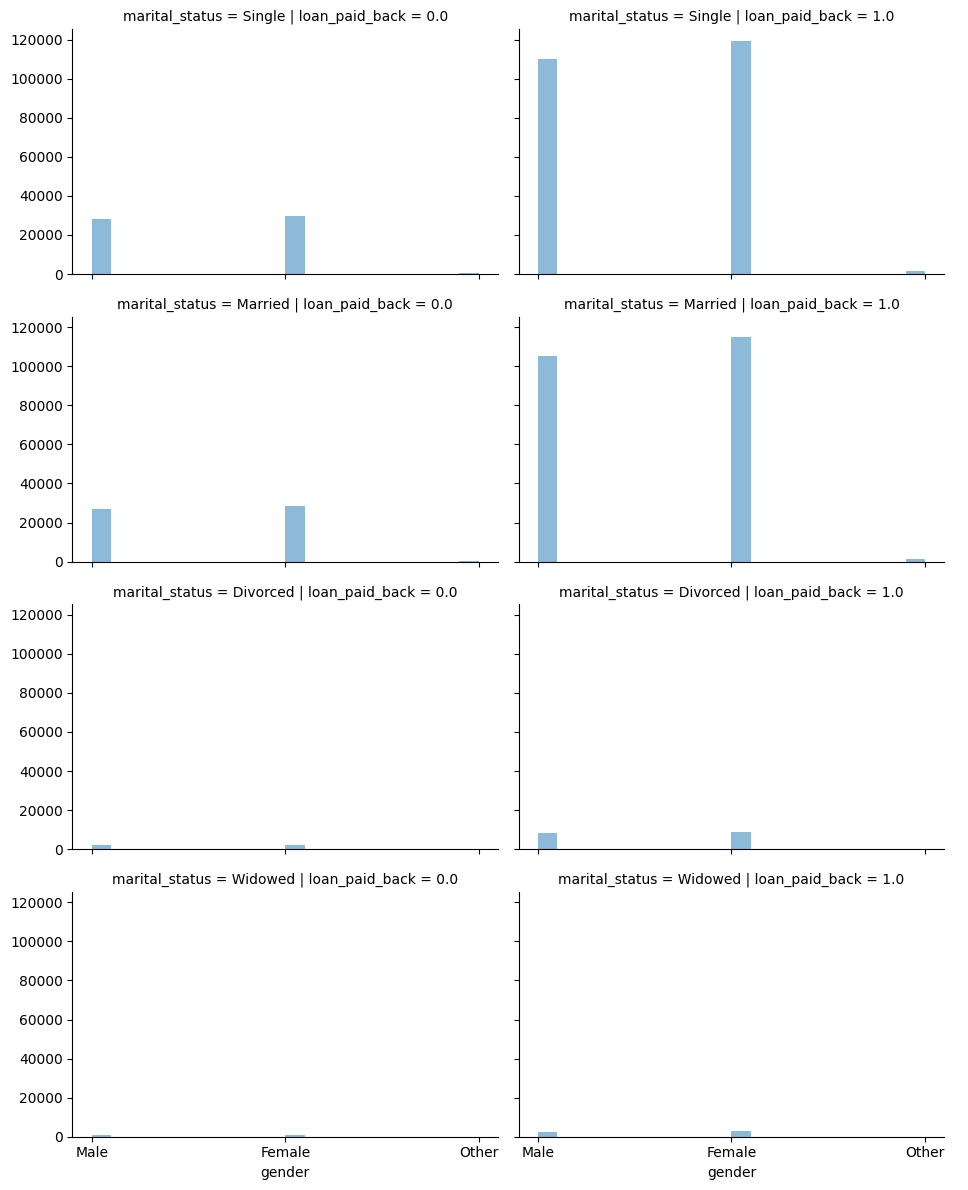

In [13]:
grid = sns.FacetGrid(train, col='loan_paid_back', row='marital_status', aspect=1.6)
grid.map(plt.hist, 'gender', alpha=.5, bins=20)
grid.add_legend()

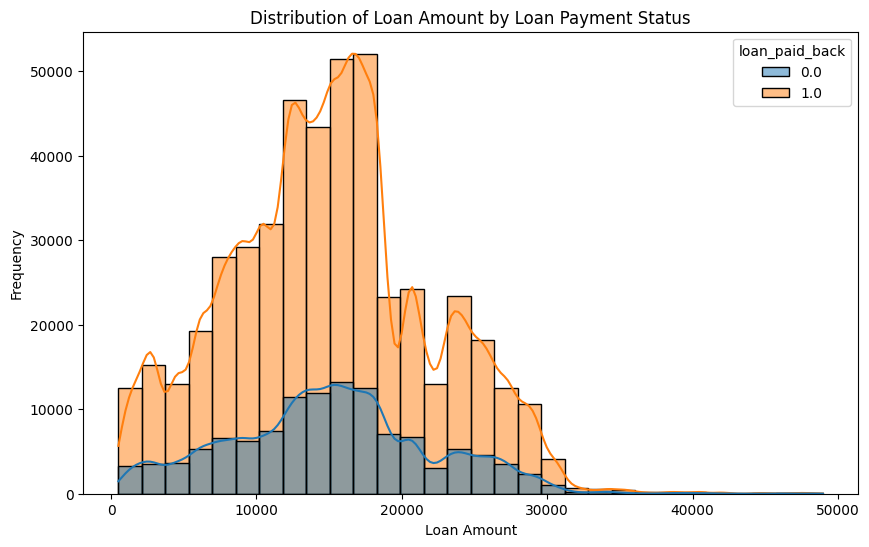

In [14]:
plt.figure(figsize=(10, 6))

sns.histplot(data=train, x='loan_amount', hue='loan_paid_back', kde=True, bins=30)
plt.title("Distribution of Loan Amount by Loan Payment Status")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

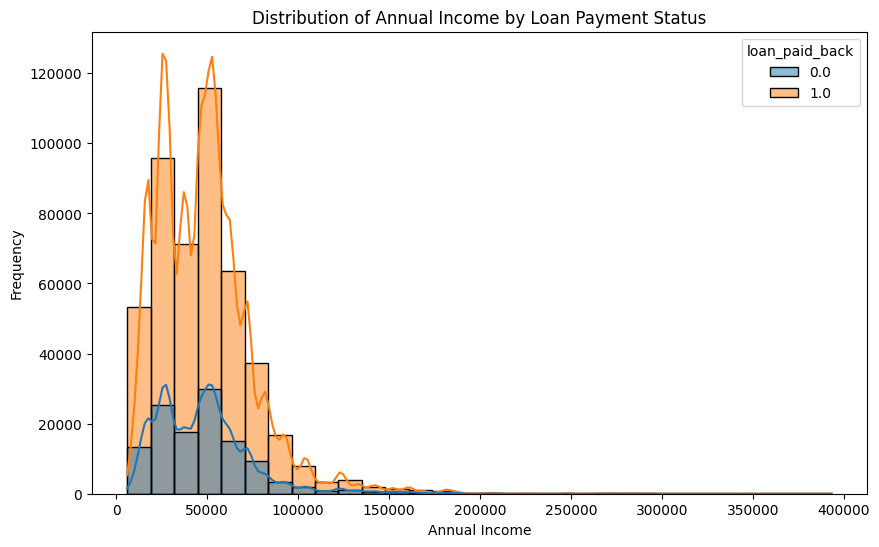

In [15]:
# annual_income distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=train, x='annual_income', hue='loan_paid_back', kde=True, bins=30)
plt.title("Distribution of Annual Income by Loan Payment Status")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Log Transformation</h1>
</div>

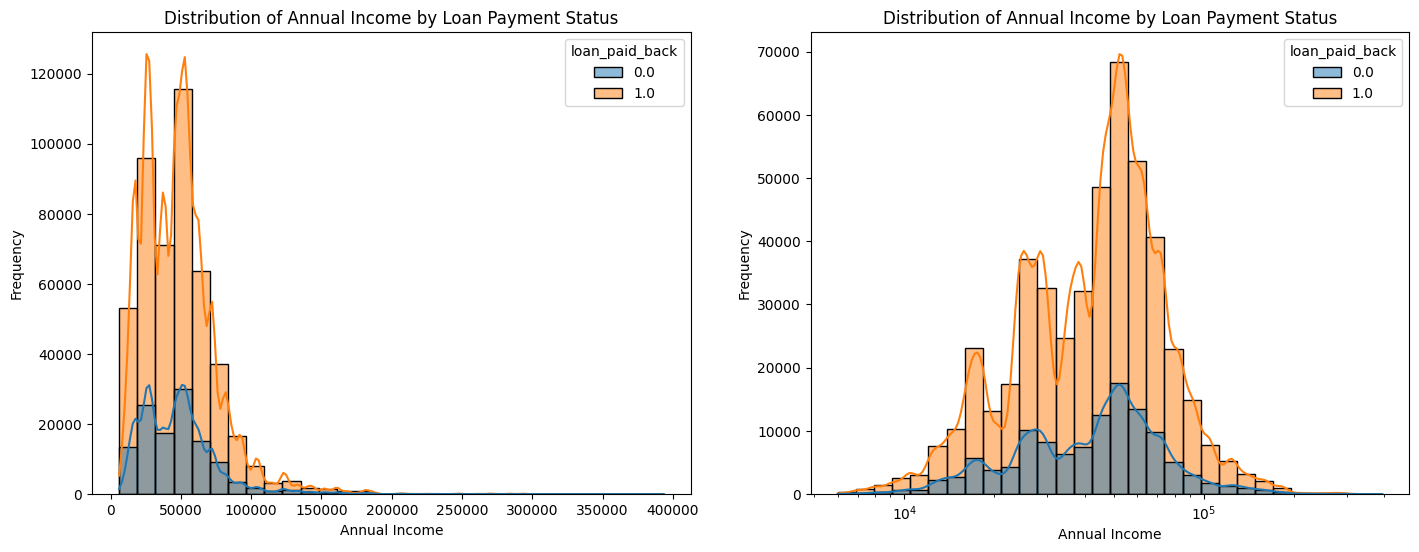

In [16]:
plt.figure(figsize=(17, 6))

plt.subplot(1,2,1)
sns.histplot(data=train, x='annual_income', hue='loan_paid_back', kde=True, bins=30)
plt.title("Distribution of Annual Income by Loan Payment Status")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(data=train, x='annual_income', hue='loan_paid_back', kde=True, bins=30,log_scale=True)
plt.title("Distribution of Annual Income by Loan Payment Status")
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Outlier Detection</h1>
</div>

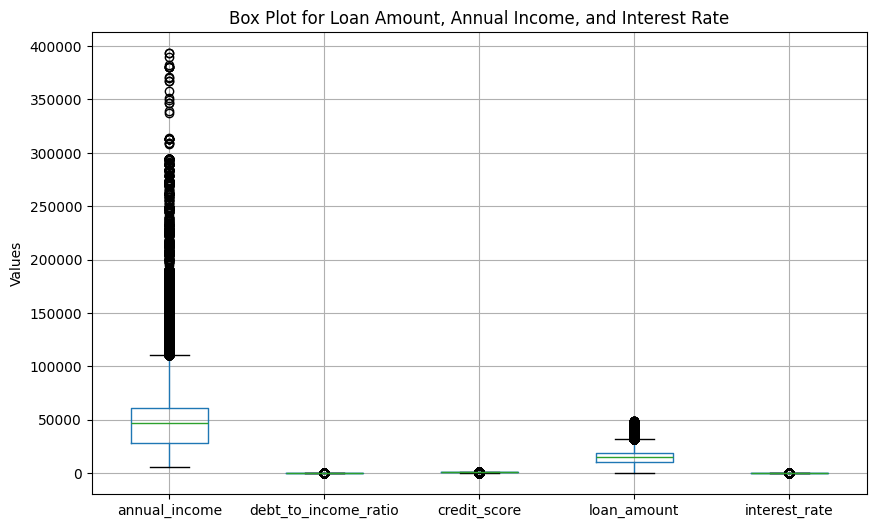

In [17]:
plt.figure(figsize=(10, 6))
boxplot = train.boxplot(column=['annual_income','debt_to_income_ratio','credit_score','loan_amount','interest_rate'])
plt.title("Box Plot for Loan Amount, Annual Income, and Interest Rate")
plt.ylabel("Values")
plt.show()

# Remove Outliers

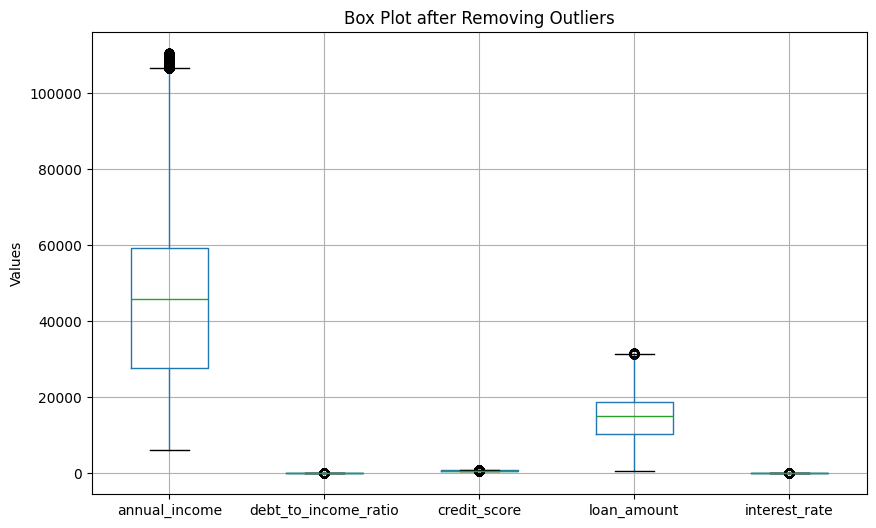

In [18]:
column=['annual_income','debt_to_income_ratio','credit_score','loan_amount','interest_rate']

train = train.copy()

for col in column:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    train = train[(train[col] >= lower_bound) & (train[col] <= upper_bound)]

# Create the box plot
plt.figure(figsize=(10, 6))
graph = train.boxplot(column=column)
plt.title("Box Plot after Removing Outliers")
plt.ylabel("Values")
plt.show()

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Encoding</h1>
</div>

In [19]:
le = LabelEncoder()

# find object columns that exist in both train and test
obj_cols = train.select_dtypes(include='object').columns

for col in obj_cols:
    train[col]=le.fit_transform(train[[col]])

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Feature Selection</h1>
</div>

In [20]:
x=train.drop(columns=["id","loan_paid_back",'debt_to_income_ratio','credit_score','loan_purpose','grade_subgrade'],axis=1)
y=train["loan_paid_back"]

print(f"Original Class Distribution: {Counter(y)}")

Original Class Distribution: Counter({1.0: 444583, 0.0: 103171})


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Split</h1>
</div>

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Balance Classes</h1>
</div>

In [22]:
smote = SMOTE(sampling_strategy=0.5, random_state=42)

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train.astype(int))

# 5. Verify the results
print(f"Class Distribution after SMOTE: {Counter(y_train_balanced)}")

Class Distribution after SMOTE: Counter({1: 355733, 0: 177866})


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Data Modeling</h1>
</div>

# `Decision Tree`

In [23]:
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train_balanced,y_train_balanced)
# model.fit(x_train,y_train)
y_pred1=model.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test,y_pred1))
print("f1_score",f1_score(y_test,y_pred1))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred1))

accuracy_score:  0.7796642659583208
f1_score 0.8580267971626534
confusion_matrix: 
 [[12473  8228]
 [15910 72940]]


# `Random Forest`

In [24]:
rf=RandomForestClassifier(random_state=42,n_estimators=10,n_jobs=-2)
rf.fit(x_train_balanced,y_train_balanced)
# rf.fit(x_train,y_train)
y_pred2=rf.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test,y_pred2))
print("f1_score",f1_score(y_test,y_pred2))
print("confusion_matrix:\n ",confusion_matrix(y_test,y_pred2))

accuracy_score:  0.8450402095827514
f1_score 0.9041856684878313
confusion_matrix:
  [[12475  8226]
 [ 8750 80100]]


# `XGBRegressor`

In [25]:
xgb=XGBClassifier(n_jobs=-2,random_state=42)
xgb.fit(x_train_balanced,y_train_balanced)
# xgb.fit(x_train,y_train)
y_pred3=xgb.predict(x_test)

print("accuracy_score: ",accuracy_score(y_test,y_pred3))
print("f1_score",f1_score(y_test,y_pred3))
print("confusion_matrix: \n",confusion_matrix(y_test,y_pred3))

accuracy_score:  0.8853593303575503
f1_score 0.9313261774178555
confusion_matrix: 
 [[11832  8869]
 [ 3690 85160]]


<div style="border-radius: 30px 0 30px 0px; border: 2px solid #00ea98; padding: 20px; background-color: #000000; text-align: center; box-shadow: 0px 2px 4px rgba(0, 0, 0, 0.2);width:95%;">
    <h1 style="color: red; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5); font-weight: bold; margin-bottom: 10px; font-size: 36px;">Result</h1>
</div>

In [26]:
models = {
    "DecisionTreeClassifier": y_pred1,
    "RandomForestClassifier": y_pred2,
    "XGBClassifier": y_pred3
}


 PLOT 1: Confusion Matrix (Graph of Each)
      


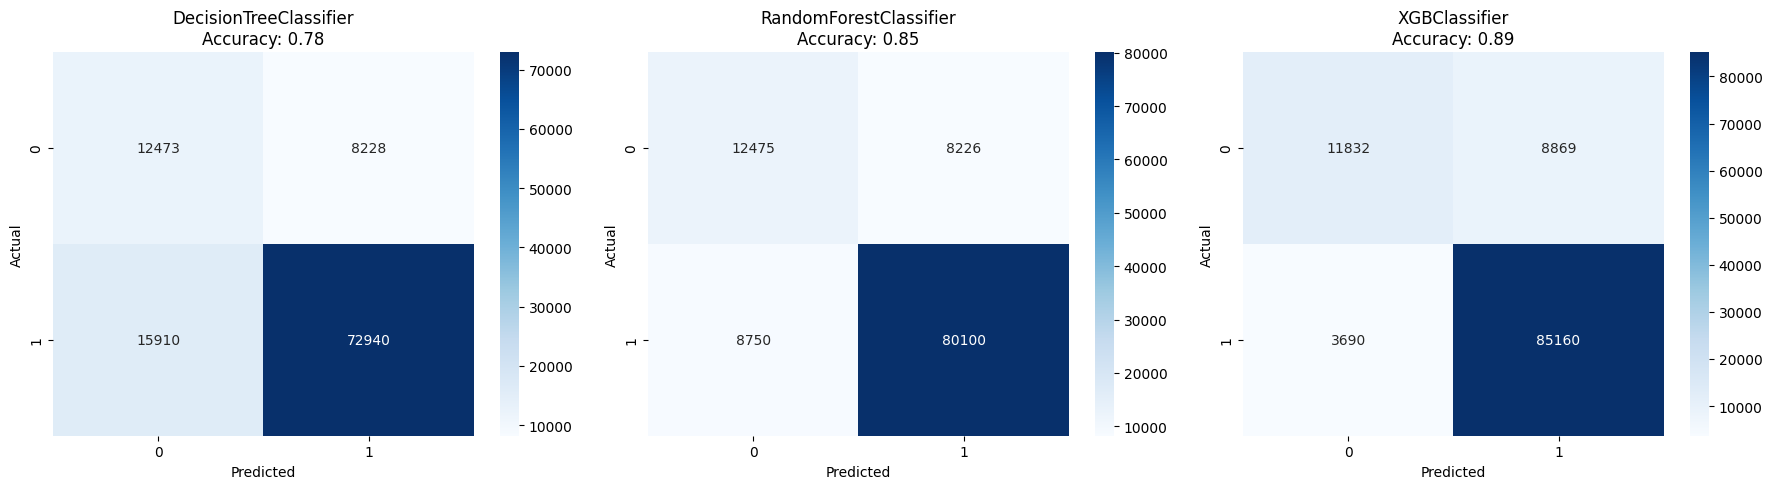

In [27]:
print('''
==========================================
 PLOT 1: Confusion Matrix (Graph of Each)
==========================================
      ''')
# We create a figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (name, preds) in enumerate(models.items()):
    cm = confusion_matrix(y_test, preds)
    acc = accuracy_score(y_test, preds)
    
    # Create Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    
    # Labels
    axes[i].set_title(f"{name}\nAccuracy: {acc:.2f}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

 
       PLOT 2: Accuracy Comparison



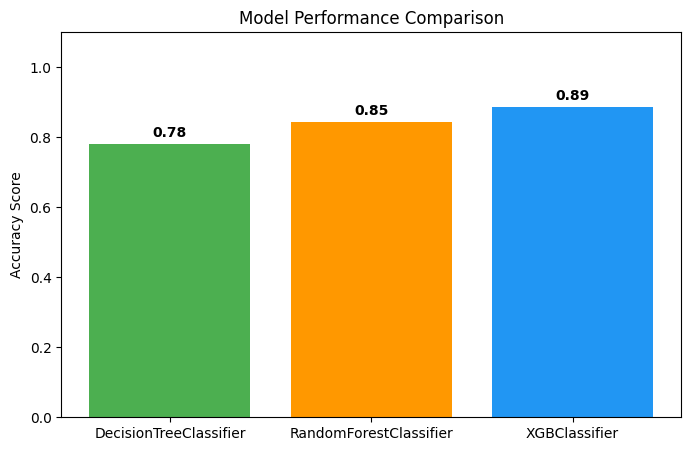

In [28]:
print(''' 
    ==========================================
       PLOT 2: Accuracy Comparison
    ==========================================
''')
accuracies = [accuracy_score(y_test, p) for p in models.values()]
names = list(models.keys())

plt.figure(figsize=(8, 5))
bars = plt.bar(names, accuracies, color=['#4CAF50', '#FF9800', '#2196F3'])

plt.title("Model Performance Comparison")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1.1) # Set y-axis limit to be slightly above 1 for text

# Add numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, 
             f"{yval:.2f}", ha='center', fontweight='bold')

plt.show()

In [29]:
# pickle to save model
import pickle
with open('loan_payback_model.pkl', 'wb') as file:
    pickle.dump(xgb, file)